# Choosing a U.S. City to Live In To Pursue Data Science Career

## Introduction 

Pursuing a Data Science career is an exciting career option for scientists and business people wanting to break into the technology industry.

One common consideration when transitioning into a tech career is whether or not it would be beneficial to move into a tech hub such as San Francisco. 

Although San Francisco is an attractive option, there are other considerations that should be weighed in order to make the best decision.

## Objective

To evaluate several U.S. cities based on cultural and climatological data to determine which cities would be a good fit to personal preferences.

## Preferences

- Weather: A mild weather is preferred.
- Scenery: A city near mountains is preferred.
- Urbanization and beautification: A city with a large number of parks is preferred.
- Outdoors: the availability of hiking trails and outdoor venues is preferred.
- Career: tech hub.
- Pollen and mold: Lower pollen and mold counts are preferred.

## Audience

This project may be of interest to any person trying to figure out where to move. 
In order to make an objective, responsible decision, one must research and weigh pros and cons.

## Data

Data will be downloaded and scraped from various sources including Foursquare and U.S. government sites.
The Foursquare data will be used to determine how many venues fit in my personal interests per city.
The climatological data will be used to record high and low temperature extremes for each city as well as yearly precipitation volume.

## Methodology

First, import libraries needed for this analysis.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests

import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from pandas.io.html import read_html
from sklearn.cluster import KMeans # import k-means from clustering stage

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  12.85 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  17.86 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  37.69 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  28.91 MB/s
vincent-0.4.4- 100% |###################

### 2. Create a list with cities of interest

In [2]:
# Enter the names of the cities of interest for this analysis
cities = ['Houston, TX','Austin, TX','Dallas, TX','San Antonio, TX','Fort Worth, Texas','San Francisco, CA','San Jose, CA','Santa Rosa, CA','Palo Alto, CA','Los Angeles, CA','Santa Barbara, CA',
          'San Diego, CA','Long Beach, CA','Palmdale, CA','Bakersfield, CA','Fresno, CA','Seattle, WA','Portland,OR','Miami, FL','Orlando, FL','Atlanta, GA','New Orleans, LA','Grand Junction, CO',
          'Denver, CO','Colorado Springs, CO','New York, NY', 'Arlington, VA','Anchorage, AK','Sacramento, CA','Tampa, FL','Des Moines, IA','Reno, NV','Las Vegas, NV',
          'Chicago, IL','Detroit, MI','Boston, MA','New Haven, CT', 'St. Louis, MO','Phoenix, AR','Albuquerque, NM','Oklahoma City, OK']

len(cities)


41

### 3.  Explore Foursquare Data

Browse Foursquare.com and find venue categories of interest.
Record Category IDs and order them in thematical lists.

In this analysis, venue data is extracted to determine whether one city or another has more venues of interest.

In [3]:
#Outdoors and Recreation Venues: Trails, Bike Trail, Botanical Gardens, Forest, Mountain, Nature Preserve, National Park

outdoors_venues_ID = ['4bf58dd8d48988d159941735','56aa371be4b08b9a8d57355e','52e81612bcbc57f1066b7a22','52e81612bcbc57f1066b7a23','4eb1d4d54b900d56c88a45fc','52e81612bcbc57f1066b7a13','52e81612bcbc57f1066b7a21']
                      
# Professional & Other Places:  Tech Startup, Convention Center, Observatory

professional_venues_ID = ['4bf58dd8d48988d125941735','4bf58dd8d48988d1ff931735','5744ccdfe4b0c0459246b4d9']
    
#cultural venues:  Spiritual Center: Buddhist Temple, Hindu Temple, Synagoge, Winery

cultural_venues_ID = ['52e81612bcbc57f1066b7a3e','52e81612bcbc57f1066b7a3f','4bf58dd8d48988d139941735','4bf58dd8d48988d14b941735']

# Food and drink shop: Farmers Market, Health Food Store, Organic Grocery, Fruit and Vegetable Store, Juice Bar

food_venues_ID = ['4bf58dd8d48988d1fa941735','50aa9e744b90af0d42d5de0e','52f2ab2ebcbc57f1066b8b45','52f2ab2ebcbc57f1066b8b1c','4bf58dd8d48988d112941735']

# Beautification: Park, Flower Shop, Art Studio

beauty_venues_ID = ['4bf58dd8d48988d163941735','4bf58dd8d48988d11b951735','58daa1558bbb0b01f18ec1d6']

categoryIDs = [outdoors_venues_ID,professional_venues_ID,cultural_venues_ID,food_venues_ID,beauty_venues_ID]

print('CategoryID list created.')


CategoryID list created.


### 4. Create a Function to Connect and Extract Data from Foursquare

In [4]:
# This function connects to Foursquare and extracts venues matching a CategoryID and 
# stores them in the dataframe designated.

def getFoursquareCityData(cities, categoryIDs, limit, max_radius):

    # Connect to Foursquare and Query each city to find the number of each venue.

    client_ID = ''
    client_secret = ''
    version = '20180605' # Foursquare API version

    print('Your credentails:')
    print('CLIENT_ID: ' + client_ID)
    print('CLIENT_SECRET:' + client_secret)

    venues_list = []
    venues_df = pd.DataFrame(columns = ['City','CategoryID','Venue','Latitude','Longitude','Type'])
    
    for city in cities:
        for list in categoryIDs:
            for category in list:
                url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&limit={}&categoryId={}'.format(
                    client_ID,
                    client_secret,
                    version,
                    city,
                    max_radius,
                    limit,
                    category)

                city_abr = city.upper()[:3]
                try:
                    venues = requests.get(url).json()['response']['groups'][0]['items']

                    venues_list.append([(
                    city,
                    category,
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],
                    v['venue']['categories'][0]['name']) for v in venues])
                except IndexError:
                    continue
                except KeyError:
                    continue

            venues_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        print(city_abr + " records extracted.")
    print("The size of your venue dataframe is:")
    print(venues_df.shape)
    return venues_df

#### 5. Populate the venues dataframe with the raw data

In [5]:
# Find venues near each city center around a 50 km radius (around 30 miles). Limit each venue list to 100 distinct venues
venues_df = getFoursquareCityData(cities, categoryIDs, 100, 100000)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:
HOU records extracted.
AUS records extracted.
DAL records extracted.
SAN records extracted.
FOR records extracted.
SAN records extracted.
SAN records extracted.
SAN records extracted.
PAL records extracted.
LOS records extracted.
SAN records extracted.
SAN records extracted.
LON records extracted.
PAL records extracted.
BAK records extracted.
FRE records extracted.
SEA records extracted.
POR records extracted.
MIA records extracted.
ORL records extracted.
ATL records extracted.
NEW records extracted.
GRA records extracted.
DEN records extracted.
COL records extracted.
NEW records extracted.
ARL records extracted.
ANC records extracted.
SAC records extracted.
TAM records extracted.
DES records extracted.
REN records extracted.
LAS records extracted.
CHI records extracted.
DET records extracted.
BOS records extracted.
NEW records extracted.
ST. records extracted.
PHO records extracted.
ALB records extracted.
OKL records extracted.
The size of 

In [6]:
venues_df.columns = ['City','CategoryID','Venue','Latitude','Longitude','Type']

### 6. QC and Filter the Foursquare data in the dataframe

#### Data QC

In [63]:
venues_df.head()

,City,CategoryID,Venue,Latitude,Longitude,Type
0,"Houston, TX",4bf58dd8d48988d159941735,Buffalo Bayou Walk,29.762177,-95.375844,Trail
1,"Houston, TX",4bf58dd8d48988d159941735,Buffalo Bayou Park,29.762068,-95.391626,Park
2,"Houston, TX",4bf58dd8d48988d159941735,Houston Arboretum & Nature Center,29.765361,-95.452177,Botanical Garden
3,"Houston, TX",4bf58dd8d48988d159941735,Herman Park Trails,29.719804,-95.388748,Trail
4,"Houston, TX",4bf58dd8d48988d159941735,Terry Hershey Park,29.779138,-95.623096,Park


First observations: 
- Found out Tree in Foursquare corresponds to tree cutting services - deleted it from categories for final report
- Found out duplicates are present
- Apparently there is a Hogwarts campus in Austin???
- University, Library, Coworking Space as parameters are not as useful as initially we though. Deleted from categories.

In [8]:
#Drop Duplicates!
venues_df = venues_df.drop_duplicates()
print('This is the size of the dataframe after dropping duplicates')
venues_df.shape

This is the size of the dataframe after dropping duplicates


(41964, 6)

Deleted ___ duplicate records!

#### Filtering the Data

Let's find out which city has the most venues of interest and which one the least.

In [9]:
# This block of code creates a new dataframe that counts how many total venues are found per city
venues_count = pd.DataFrame(venues_df.groupby('City').count()['Venue'])
venues_count = venues_count.sort_values(by=['Venue'])
venues_count = venues_count.reset_index()
max_number = venues_count['Venue'].max()
max_city = venues_count.iloc[venues_count['Venue'].idxmax()][0]
min_number = venues_count['Venue'].min()
min_city = venues_count.iloc[venues_count['Venue'].idxmin()][0]
cities = list(venues_count['City'])
venues_count

,City,Venue
0,"Anchorage, AK",267
1,"Grand Junction, CO",277
2,"Phoenix, AR",422
3,"Bakersfield, CA",471
4,"Albuquerque, NM",481
5,"Reno, NV",484
6,"Oklahoma City, OK",492
7,"Fresno, CA",498
8,"Des Moines, IA",527
9,"New Orleans, LA",719


In [10]:
print('The city with the highest amount of venues matching your interests is: ' + str(max_city) +
      ' with ' + str(max_number) + ' venues.')
print('The city with the lowest amount of venues matching your interests is: ' + str(min_city) +
      ' with ' + str(min_number) + ' venues.')

The city with the highest amount of venues matching your interests is: New York, NY with 1762 venues.
The city with the lowest amount of venues matching your interests is: Anchorage, AK with 267 venues.


Let's find out which venue types are more relevant to include in our analysis

In [11]:
# Create a dataframe that counts the total number of venues per type found.
venue_types_df = pd.DataFrame(venues_df.groupby('Type').count())

In [12]:
venue_types_df.head()

,City,CategoryID,Venue,Latitude,Longitude
Type,,,,,
Accessories Store,3,3,3,3,3
Advertising Agency,8,8,8,8,8
Alternative Healer,3,3,3,3,3
American Restaurant,26,26,26,26,26
Amphitheater,6,6,6,6,6


We see here that some venues seem less significant than others, so we are going to filter out the least common types 
and create a list of the relevant types.

In [13]:
# delete types that don't meet a certain thresh

relevant_venues_df = venue_types_df[venue_types_df['City'] > 20]
relevant_venues_df = relevant_venues_df.reset_index()
relevant_venues_df.head()


,Type,City,CategoryID,Venue,Latitude,Longitude
0,American Restaurant,26,26,26,26,26
1,Art Gallery,79,79,79,79,79
2,Art Museum,24,24,24,24,24
3,Art Studio,311,311,311,311,311
4,Bakery,26,26,26,26,26


In [14]:
# create a list of relevant venues

In [15]:
relevant_types = relevant_venues_df['Type'].tolist()
relevant_types


['American Restaurant',
 'Art Gallery',
 'Art Museum',
 'Art Studio',
 'Bakery',
 'Beach',
 'Bike Shop',
 'Bike Trail',
 'Botanical Garden',
 'Bridge',
 'Buddhist Temple',
 'Café',
 'Campground',
 'City',
 'Coffee Shop',
 'Convention Center',
 'Dog Run',
 'Event Space',
 'Farm',
 'Farmers Market',
 'Field',
 'Flower Shop',
 'Food & Drink Shop',
 'Forest',
 'Fruit & Vegetable Store',
 'Garden',
 'Garden Center',
 'General Entertainment',
 'Gourmet Shop',
 'Grocery Store',
 'Health Food Store',
 'Hindu Temple',
 'Historic Site',
 'History Museum',
 'Hotel',
 'Italian Restaurant',
 'Juice Bar',
 'Lake',
 'Liquor Store',
 'Market',
 'Monument / Landmark',
 'Mountain',
 'Museum',
 'National Park',
 'Nature Preserve',
 'Neighborhood',
 'Observatory',
 'Office',
 'Organic Grocery',
 'Other Great Outdoors',
 'Park',
 'Playground',
 'Plaza',
 'Resort',
 'Restaurant',
 'Road',
 'Scenic Lookout',
 'Shopping Mall',
 'Ski Area',
 'State / Provincial Park',
 'Supermarket',
 'Supplement Shop',
 'Syna

#### Create final filtered dataframe

In [16]:
#Filter out irrelevant types from dataset
# Create now the final dataframe where the irrelevant types are 
df = venues_df
df = df.loc[df['Type'].isin(relevant_types)]
df.shape

(41038, 6)

In [17]:
df.head()

,City,CategoryID,Venue,Latitude,Longitude,Type
0,"Houston, TX",4bf58dd8d48988d159941735,Buffalo Bayou Walk,29.762177,-95.375844,Trail
1,"Houston, TX",4bf58dd8d48988d159941735,Buffalo Bayou Park,29.762068,-95.391626,Park
2,"Houston, TX",4bf58dd8d48988d159941735,Houston Arboretum & Nature Center,29.765361,-95.452177,Botanical Garden
3,"Houston, TX",4bf58dd8d48988d159941735,Herman Park Trails,29.719804,-95.388748,Trail
4,"Houston, TX",4bf58dd8d48988d159941735,Terry Hershey Park,29.779138,-95.623096,Park


### 7. Format Foursquare Data for Plotting

Prepare the data for plotting.
Create various slices of the data for input in a horizontal bar chart.

In [18]:
# Create dataframes for each venue category

outdoors_df = df.loc[df['CategoryID'].isin(outdoors_venues_ID)]
startups_df = df.loc[df['CategoryID'].isin(professional_venues_ID)]
cultural_df = df.loc[df['CategoryID'].isin(cultural_venues_ID)]
food_df = df.loc[df['CategoryID'].isin(food_venues_ID)]
beauty_df = df.loc[df['CategoryID'].isin(beauty_venues_ID)]
print('Done')

Done


In [19]:
# Count the numbers of venues in each category.
outdoors_count = pd.DataFrame(outdoors_df.groupby('City').count()['Venue'])
outdoors_count = outdoors_count.reindex(venues_count['City'])
startups_count = pd.DataFrame(startups_df.groupby('City').count()['Venue'])
startups_count = startups_count.reindex(venues_count['City'])
cultural_count = pd.DataFrame(cultural_df.groupby('City').count()['Venue'])
cultural_count = cultural_count.reindex(venues_count['City'])
food_count = pd.DataFrame(food_df.groupby('City').count()['Venue'])
food_count = food_count.reindex(venues_count['City'])
beauty_count = pd.DataFrame(beauty_df.groupby('City').count()['Venue'])
beauty_count = beauty_count.reindex(venues_count['City'])
print('Done')

Done


In [20]:
# Create a function to count how many of each category are present per city

def makeList(cities, count_df):
    N = len(cities)
    count_list = []
    for index in range(0,N):
        city_total = count_df.iloc[index][0]
        count_list.append(city_total)
    return count_list
print('Done')

Done


In [21]:
# Apply the function to create lists of total venues per category
outdoors_count_list = makeList(cities, outdoors_count)
startups_count_list = makeList(cities, startups_count)
cultural_count_list = makeList(cities, cultural_count)
food_count_list = makeList(cities, food_count)
beauty_count_list = makeList(cities, beauty_count)
print('Done')

# YOU HAVE TO ORDER THIS DATAFRAME BY THE ORDER OF VENUE_COUNT

Done


In [22]:
py.sign_in('tinaprisma','bti38jh0wvCmy3lmrJ95')

### 8. Plot Foursquare Data

In [126]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    y= cities[0:20],
    x= outdoors_count_list[0:20],
    name='Outdoors',
    orientation = 'h',
    marker = dict(
        color = 'rgba(73,124,81,0.8)',
    )
)
trace2 = go.Bar(
    y= cities[0:20],
    x= startups_count_list[0:20],
    name='Startups',
    orientation = 'h',
    marker = dict(
        color = 'rgba(81,73,124,0.8)'
   )
)
trace3 = go.Bar(
    y= cities[0:20],
    x= cultural_count_list[0:20],
    name='Cultural',
    orientation = 'h',
    marker = dict(
        color = 'rgba(124,73,116,0.8)',
   )
)
trace4 = go.Bar(
    y= cities[0:20],
    x= food_count_list[0:20],
    name='Food',
    orientation = 'h',
    marker = dict(
        color = 'rgba(139,115,95,0.8)',
    )
)
trace5 = go.Bar(
    y= cities[0:20],
    x= beauty_count_list[0:20],
    name='Beauty',
    orientation = 'h',
    marker = dict(
        color = 'rgba(95,119,139,0.8)',
    )
)       
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    barmode='stack', title = 'Foursquare Venue Categories in U.S. Cities',xaxis=dict(range=[0, 1800]))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

In [129]:
import plotly.plotly as py
import plotly.graph_objs as go

tracea = go.Bar(
    y= cities[20:42],
    x= outdoors_count_list[20:42],
    name='Outdoors',
    orientation = 'h',
    marker = dict(
        color = 'rgba(73,124,81,0.8)',
    )
)
traceb = go.Bar(
    y= cities[20:42],
    x= startups_count_list[20:42],
    name='Startups',
    orientation = 'h',
    marker = dict(
        color = 'rgba(81,73,124,0.8)'
   )
)
tracec = go.Bar(
    y= cities[20:42],
    x= cultural_count_list[20:42],
    name='Cultural',
    orientation = 'h',
    marker = dict(
        color = 'rgba(124,73,116,0.8)',
   )
)
traced = go.Bar(
    y= cities[20:42],
    x= food_count_list[20:42],
    name='Food',
    orientation = 'h',
    marker = dict(
        color = 'rgba(139,115,95,0.8)',
    )
)
tracee = go.Bar(
    y= cities[20:42],
    x= beauty_count_list[20:42],
    name='Beauty',
    orientation = 'h',
    marker = dict(
        color = 'rgba(95,119,139,0.8)',
    )
)

data2 = [tracea, traceb, tracec, traced, tracee]
layout2 = go.Layout(
    barmode='stack', title = 'Foursquare Venue Categories in U.S. Cities continued',xaxis=dict(range=[0, 1800])
)

fig2 = go.Figure(data=data2, layout=layout2)
py.iplot(fig2, filename='marker-h2-bar')

We observe that there are more startups than the limit imposed by Foursquare. WE could add more points inside the city, or we can rely on data points that are more predicitive.
According to this analysis, Houston and Denver look very similar, but we know this is not the case.

### 9. Scrape Temperature Data for Each City and Compare Plots

Temperature data was scraped from a US government dataset (NOAA.gov)

To do this, we first had to research the city codes for each of our cities.

Then, we had to understand the structure of the data as it was published.

We found out that there was a pattern in the URLs that we could leverage to scrape automatically lots of data.

In [25]:
city_codes = ['USW00012918','USW00013958','USW00093037','USW00024233','USW00023234','USW00024229']
#these correspond to the order found in our list, cities.

temp_measures = ['tmin', 'tavg', 'tmax']

temperatures_df = pd.DataFrame()



In [26]:
# This function creates a list of URLs where NOAA.gov stores temperature data for the month of August between the years 2000-2019 
# August will be a proxy for Summer Temperatures

def extractAugURL(city_codes, temp_measures):
    
    aug_temps_city_list=[]
    
    for c in range(0,len(city_codes)):
        aug_url_list = []
        for t in range(0,len(temp_measures)):
            aug_url = 'https://www.ncdc.noaa.gov/cag/city/time-series/' + city_codes[c] + '-' + temp_measures[t] + '-1-8-2000-2019.csv' #scrape august data
            #aug_url_list.append(aug_url)
            aug_temps_city_list.append(aug_url)
       
    return aug_temps_city_list
   
# This function creates a list of URLs where NOAA.gov stores temperature data for the month of February between the years 2000-2019 
# February will be a proxy for Winter Temperatures

def extractFebURL(city_codes, temp_measures):
    
    feb_temps_city_list=[]
    
    for c in range(0,len(city_codes)):
        feb_url_list = []
        for t in range(0,len(temp_measures)):
            feb_url = 'https://www.ncdc.noaa.gov/cag/city/time-series/' + city_codes[c] + '-' + temp_measures[t] + '-1-2-2000-2019.csv' #scrape FEBR data
            feb_temps_city_list.append(feb_url)
        
    return feb_temps_city_list
   

In [27]:
# Create a list of URLS for each city and season, making use of the above functions
aug_urls = extractAugURL(city_codes, temp_measures)
feb_urls = extractFebURL(city_codes, temp_measures)

In [28]:
# Extract the August Temperature Data CSV file from NOAA.gov and store it as a dataframe
# Create a list of dataframes that will later be filtered for each City
aug_master_list = []  # created a list with aaaallll the dataframes 
for url in range(0,len(aug_urls)):
    aug_df = pd.read_csv(aug_urls[url])
    aug_df = aug_df.drop([0,1,2])
    aug_df = aug_df.reset_index()
    aug_df = aug_df.drop(aug_df.columns[-1], axis=1)
    aug_df = aug_df.drop(aug_df.columns[-1], axis=1)
    aug_df = aug_df.drop(aug_df.columns[0], axis=1)
    aug_master_list.append(aug_df)
print('Done')

Done


In [29]:
# Extract the February Temperature Data CSV file from NOAA.gov and store it as a dataframe
# Create a list of dataframes that will later be filtered for each City

feb_master_list = []  
for url in range(0,len(feb_urls)):
    feb_df = pd.read_csv(feb_urls[url])
    feb_df = feb_df.drop([0,1,2])
    feb_df = feb_df.reset_index()
    feb_df = feb_df.drop(feb_df.columns[-1], axis=1)
    feb_df = feb_df.drop(feb_df.columns[-1], axis=1)
    feb_df = feb_df.drop(feb_df.columns[0], axis=1)
    feb_master_list.append(feb_df)
print('Done')

Done


In [30]:
# This function returns a dataframe for each US City analysed containing organized temperature data

def createCityTempDF(feb_master_list, aug_master_list, start_index):
    df = pd.DataFrame()
    list1=[]
    list1a=[]
    list2=[]
    list3=[]
    list4=[]
    list5=[]
    list6=[]
    i1 = start_index
    i2 = start_index + 1
    i3 = start_index + 2
    for num in range(0,19):
        df1 = feb_master_list[i1]
        df2 = feb_master_list[i2]
        df3 = feb_master_list[i3]
        df4 = aug_master_list[i1]
        df5 = aug_master_list[i2]
        df6 = aug_master_list[i3]
        list1.append(df1.iloc[num][0])
        list1a.append(df1.iloc[num][1])
        list2.append(df2.iloc[num][1])
        list3.append(df3.iloc[num][1])
        list4.append(df4.iloc[num][1])
        list5.append(df5.iloc[num][1])
        list6.append(df6.iloc[num][1])
    df['Date'] = pd.Series(list1, index = df1.index[:len(list1)])
    df['Feb Minimum'] = pd.Series(list1a, index = df1.index[:len(list2)]) 
    df['Feb Average'] = pd.Series(list2, index = df2.index[:len(list3)])
    df['Feb Maximum'] = pd.Series(list3, index = df3.index[:len(list4)]) 
    df['Aug Minimum'] = pd.Series(list4, index = df4.index[:len(list2)]) 
    df['Aug Average'] = pd.Series(list5, index = df5.index[:len(list3)])
    df['Aug Maximum'] = pd.Series(list6, index = df6.index[:len(list4)])
    return df
    

Extract Temperature Data for Each City and Store in dataframe

In [31]:
hou_temp_df = createCityTempDF(feb_master_list, aug_master_list, 0)
aus_temp_df = createCityTempDF(feb_master_list, aug_master_list, 3)
den_temp_df = createCityTempDF(feb_master_list, aug_master_list, 6)
sea_temp_df = createCityTempDF(feb_master_list, aug_master_list, 9)
san_temp_df = createCityTempDF(feb_master_list, aug_master_list, 12)
por_temp_df = createCityTempDF(feb_master_list, aug_master_list, 15)
print('This is an example of the resulting dataframe:')
por_temp_df

This is an example of the resulting dataframe:


,Date,Feb Minimum,Feb Average,Feb Maximum,Aug Minimum,Aug Average,Aug Maximum
0,200002,37.1,43.7,50.3,56.9,67.8,78.7
1,200102,33.6,42.0,50.3,58.3,69.2,80.1
2,200202,36.3,44.4,52.4,57.2,69.3,81.4
3,200302,37.0,44.3,51.6,58.4,70.1,81.7
4,200402,38.8,45.2,51.7,60.7,71.5,82.3
5,200502,33.2,43.5,53.8,58.1,70.7,83.3
6,200602,34.7,42.0,49.3,57.1,69.2,81.2
7,200702,38.0,44.2,50.4,58.0,68.3,78.5
8,200802,37.3,44.9,52.4,59.2,69.6,80.0
9,200902,32.4,41.3,50.3,59.3,69.9,80.5


### 10. Plot Temperature Data

In [66]:
# Store Temperatures in variables in preparation for the plot.

import plotly.plotly as py
import plotly.graph_objs as go

x = list(range(0,19))
x_rev = x[::-1]

# Houston Summer Temperatures
y1 = list(hou_temp_df['Aug Average'])
y1_upper = list(hou_temp_df['Aug Maximum'])
y1_lower = list(hou_temp_df['Aug Minimum'])
y1_lower = y1_lower[::-1]

# Houston Summer Avg T
trace1 = go.Scatter(
    x=x,
    y=y1,
    line=dict(color='rgb(73,124,81)'),
    mode='lines',
    name='°F (Summer)',
    showlegend=False
)
# Houston Summer Hi & Lo T
trace2 = go.Scatter(
    x=x+x_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(73,124,81,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# Houston Winter Temperatures 
y2 = list(hou_temp_df['Feb Average'])
y2_upper = list(hou_temp_df['Feb Maximum'])
y2_lower = list(hou_temp_df['Feb Minimum'])
y2_lower = y2_lower[::-1]

# Houston Winter Line Average
trace3 = go.Scatter(
    x=x,
    y=y2,
    line=dict(color='rgb(73,124,81)'),
    mode='lines',
    name='°F (Winter)',
    showlegend=False,
)
# Houston Winter High and Low
trace4 = go.Scatter(
    x=x+x_rev,
    y=y2_upper+y2_lower,
    fill='tozerox',
    fillcolor='rgba(73,124,81,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# Austin Summer Temperatures
y3 = list(aus_temp_df['Aug Average'])
y3_upper = list(aus_temp_df['Aug Maximum'])
y3_lower = list(aus_temp_df['Aug Minimum'])
y3_lower = y3_lower[::-1]

# Austin Summer Avg T
trace5 = go.Scatter(
    x=x,
    y=y3,
    line=dict(color='rgb(81,73,124)'),
    mode='lines',
    name='°F (Summer)',
    showlegend=False
)

# Austin Summer Hi & Lo T
trace6 = go.Scatter(
    x=x+x_rev,
    y=y3_upper+y3_lower,
    fill='tozerox',
    fillcolor='rgba(81,73,124,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# Austin Winter Temperatures
y4 = list(aus_temp_df['Feb Average'])
y4_upper = list(aus_temp_df['Feb Maximum'])
y4_lower = list(aus_temp_df['Feb Minimum'])
y4_lower = y4_lower[::-1]

# Austin Winter Average T
trace7 = go.Scatter(
    x=x,
    y=y4,
    line=dict(color='rgb(81,73,124)'),
    mode='lines',
    name='°F (Winter)',
    showlegend=False,
)
# Austin Winter Hi & Lo T
trace8 = go.Scatter(
    x=x+x_rev,
    y=y4_upper+y4_lower,
    fill='tozerox',
    fillcolor='rgba(81,73,124,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)
# Denver Summer Temperatures
y5 = list(den_temp_df['Aug Average'])
y5_upper = list(den_temp_df['Aug Maximum'])
y5_lower = list(den_temp_df['Aug Minimum'])
y5_lower = y5_lower[::-1]

# Denver Summer Average T
trace9 = go.Scatter(
    x=x,
    y=y5,
    line=dict(color='rgb(124,73,116)'),
    mode='lines',
    name='°F (Summer)',
    showlegend=False
)
# Denver Summer Hi & Lo T
trace10 = go.Scatter(
    x=x+x_rev,
    y=y5_upper+y5_lower,
    fill='tozerox',
    fillcolor='rgba(124,73,116,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# Denver Winter Temperatures
y6 = list(den_temp_df['Feb Average'])
y6_upper = list(den_temp_df['Feb Maximum'])
y6_lower = list(den_temp_df['Feb Minimum'])
y6_lower = y6_lower[::-1]

# Denver Winter Average T
trace11 = go.Scatter(
    x=x,
    y=y6,
    line=dict(color='rgb(124,73,116)'),
    mode='lines',
    name='°F (Winter)',
    showlegend=False,
)
# Denver Winter Hi & Lo T
trace12 = go.Scatter(
    x=x+x_rev,
    y=y6_upper+y6_lower,
    fill='tozerox',
    fillcolor='rgba(124,73,116,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)


# Seattle Summer Temperature
y7 = list(sea_temp_df['Aug Average'])
y7_upper = list(sea_temp_df['Aug Maximum'])
y7_lower = list(sea_temp_df['Aug Minimum'])
y7_lower = y7_lower[::-1]

# Seattle Summer Average T
trace13 = go.Scatter(
    x=x,
    y=y7,
    line=dict(color='rgb(124,73,116)'),
    mode='lines',
    name='°F (Summer)',
    showlegend=False
)
# Seattle Summer Hi & Lo T
trace14 = go.Scatter(
    x=x+x_rev,
    y=y7_upper+y7_lower,
    fill='tozerox',
    fillcolor='rgba(124,73,116,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# Seattle Winter Temperatures
y8 = list(sea_temp_df['Feb Average'])
y8_upper = list(sea_temp_df['Feb Maximum'])
y8_lower = list(sea_temp_df['Feb Minimum'])
y8_lower = y8_lower[::-1]

# Seattle Winter Average T
trace15 = go.Scatter(
    x=x,
    y=y8,
    line=dict(color='rgb(124,73,116)'),
    mode='lines',
    name='°F (Winter)',
    showlegend=False,
)
# Seattle Winter Hi & Lo T
trace16 = go.Scatter(
    x=x+x_rev,
    y=y8_upper+y8_lower,
    fill='tozerox',
    fillcolor='rgba(124,73,116,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)
# San Francisco Summer Temperatures
y9 = list(san_temp_df['Aug Average'])
y9_upper = list(san_temp_df['Aug Maximum'])
y9_lower = list(san_temp_df['Aug Minimum'])
y9_lower = y9_lower[::-1]

# San Francisco Summer Average T
trace17 = go.Scatter(
    x=x,
    y=y9,
    line=dict(color='rgb(139,115,95)'),
    mode='lines',
    name='°F (Summer)',
    showlegend=False
)
# San Francisco Summer Hi & Lo T
trace18 = go.Scatter(
    x=x+x_rev,
    y=y9_upper+y9_lower,
    fill='tozerox',
    fillcolor='rgba(139,115,95,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# San Francisco Winter Temperatures
y10 = list(san_temp_df['Feb Average'])
y10_upper = list(san_temp_df['Feb Maximum'])
y10_lower = list(san_temp_df['Feb Minimum'])
y10_lower = y10_lower[::-1]

# San Francisco Winter Average T
trace19 = go.Scatter(
    x=x,
    y=y10,
    line=dict(color='rgb(139,115,95)'),
    mode='lines',
    name='°F (Winter)',
    showlegend=False,
)
# San Francisco Winter Hi & Lo T
trace20 = go.Scatter(
    x=x+x_rev,
    y=y10_upper+y10_lower,
    fill='tozerox',
    fillcolor='rgba(139,115,95,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)

# Portland Summer Temperatures
y11= list(por_temp_df['Aug Average'])
y11_upper = list(por_temp_df['Aug Maximum'])
y11_lower = list(por_temp_df['Aug Minimum'])
y11_lower = y11_lower[::-1]

# Portland Summer Average T
trace21 = go.Scatter(
    x=x,
    y=y11,
    line=dict(color='rgb(95,119,139)'),
    mode='lines',
    name='°F (Summer)',
    showlegend=False
)
# Portland Summer Hi & Lo T
trace22 = go.Scatter(
    x=x+x_rev,
    y=y11_upper+y11_lower,
    fill='tozerox',
    fillcolor='rgba(95,119,139,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)
# Portland Winter Temperatures
y12 = list(por_temp_df['Feb Average'])
y12_upper = list(por_temp_df['Feb Maximum'])
y12_lower = list(por_temp_df['Feb Minimum'])
y12_lower = y12_lower[::-1]

# Portland Winter Average T
trace23 = go.Scatter(
    x=x,
    y=y12,
    line=dict(color='rgb(95,119,139)'),
    mode='lines',
    name='°F (Winter)',
    showlegend=False,
)

# Portland Winter Hi and Lo T
trace24 = go.Scatter(
    x=x+x_rev,
    y=y12_upper+y12_lower,
    fill='tozerox',
    fillcolor='rgba(95,119,139,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo='none'
)


In [67]:
# Set the layout and append lines for plotting

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12,
        trace13, trace14, trace15, trace16, trace17, trace18, trace19, trace20, trace21, trace22, trace23, trace24]


fig = tools.make_subplots(rows=3, cols=2, subplot_titles=('Houston', 'Austin',
                                                          'Denver', 'Seattle',
                                                          'San Francisco','Portland'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 1)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 1, 2)
fig.append_trace(trace7, 1, 2)
fig.append_trace(trace8, 1, 2)
fig.append_trace(trace9, 2, 1)
fig.append_trace(trace10, 2, 1)
fig.append_trace(trace11, 2, 1)
fig.append_trace(trace12, 2, 1)
fig.append_trace(trace13, 2, 2)
fig.append_trace(trace14, 2, 2)
fig.append_trace(trace15, 2, 2)
fig.append_trace(trace16, 2, 2)
fig.append_trace(trace17, 3, 1)
fig.append_trace(trace18, 3, 1)
fig.append_trace(trace19, 3, 1)
fig.append_trace(trace20, 3, 1)
fig.append_trace(trace21, 3, 2)
fig.append_trace(trace22, 3, 2)
fig.append_trace(trace23, 3, 2)
fig.append_trace(trace24, 3, 2)

fig['layout'].update(title='Summer & Winter Temperatures in U.S. Cities (2000-2018)')

py.iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



### 10. Scrape Precipitation Data and Plot

In [37]:
# This function creates URLs used to scrape data automatically
def extractRainURL(city_codes):
    
    precipitation_list = []
    
    for c in range(0,len(city_codes)):
        
        pre_url = 'https://www.ncdc.noaa.gov/cag/city/time-series/' + city_codes[c] + '-pcp-12-12-2000-2019.csv' #scrape august data
            #aug_url_list.append(aug_url)
        precipitation_list.append(pre_url)
       
    return precipitation_list

In [38]:
# This block extracts the precipitation data CSV files from NOAA.gov and creates a list of dataframes
precipitation_urls = extractRainURL(city_codes)
precipitation_master_list = []  # created a list with aaaallll the dataframes 
for url in range(0,len(precipitation_urls)):
    pre_df = pd.read_csv(precipitation_urls[url])
    pre_df = pre_df.drop([0,1,2])
    pre_df = pre_df.reset_index()
    pre_df = pre_df.drop(pre_df.columns[-1], axis=1)
    pre_df = pre_df.drop(pre_df.columns[-1], axis=1)
    pre_df = pre_df.drop(pre_df.columns[0], axis=1)
    precipitation_master_list.append(pre_df)
print('Done')

Done


In [39]:
# this function creates a dataframe of precipitation data for a city at the "start index"
def createCityTempDF(precipitation_master_list, start_index):
    df = pd.DataFrame()
    list=[]
    i1 = start_index
    for num in range(0,19):
        df = precipitation_master_list[i1]
        list.append(df.iloc[num][1])
    df['Precipitation'] = pd.Series(list, index = df.index[:len(list)])
    return df
    

In [40]:
precipitation_master_list

[   Houston  Texas
 0   200012  45.81
 1   200112  81.69
 2   200212  58.89
 3   200312  45.18
 4   200412  56.16
 5   200512  35.74
 6   200612  62.15
 7   200712  68.09
 8   200812  56.28
 9   200912  52.59
 10  201012  47.02
 11  201112  25.39
 12  201212  51.87
 13  201312  43.08
 14  201412  41.17
 15  201512  77.14
 16  201612  56.85
 17  201712  79.19
 18  201812  52.52,     Austin  Texas
 0   200012  37.30
 1   200112  42.89
 2   200212  36.04
 3   200312  21.43
 4   200412  52.28
 5   200512  22.36
 6   200612  34.72
 7   200712  46.94
 8   200812  16.09
 9   200912  31.40
 10  201012  37.76
 11  201112  19.69
 12  201212  33.02
 13  201312  41.05
 14  201412  35.56
 15  201512  59.98
 16  201612  38.87
 17  201712  34.73
 18  201812  40.55,    Colorado Springs  Colorado
 0            200012     16.92
 1            200112     15.02
 2            200212      7.89
 3            200312     12.44
 4            200412     21.14
 5            200512     11.87
 6            200612   

#### Create a dataframe of precipitation data for each city

In [41]:
hou_prec_df = createCityTempDF(precipitation_master_list, 0)
aus_prec_df = createCityTempDF(precipitation_master_list, 1)
den_prec_df = createCityTempDF(precipitation_master_list, 2)
sea_prec_df = createCityTempDF(precipitation_master_list, 3)
san_prec_df = createCityTempDF(precipitation_master_list, 4)
por_prec_df = createCityTempDF(precipitation_master_list, 5)

### Plot Precipation Data for Each City

In [42]:
# Store precipitation data in variables in preparation for the plot.

x = list(range(0,19))
x_rev = x[::-1]

# Houston Prec Data 2000 - 2019
y1 = list(hou_prec_df['Precipitation'])
y1_lower = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y1_lower = y1_lower[::-1]
trace1 = go.Scatter(
    x=x,
    y=y1,
    line=dict(color='rgb(81,73,124)'),
    mode='lines',
    name='Inches',
    showlegend=False,

)
'''trace7 = go.Scatter(
    x=x+x_rev,
    y= y1,
    fill='tozerox',
    fillcolor='rgba(81,73,124,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
)'''
y2 = list(aus_prec_df['Precipitation'])
trace2 = go.Scatter(
    x=x,
    y=y2,
    line=dict(color='rgb(124,73,116)'),
    mode='lines',
    name='Inches',
    showlegend=False
)
y3 = list(den_prec_df['Precipitation'])
trace3 = go.Scatter(
    x=x,
    y=y3,
    line=dict(color='rgb(139,115,95)'),
    mode='lines',
    name='Inches',
    showlegend=False
)
y4 = list(sea_prec_df['Precipitation'])
trace4 = go.Scatter(
    x=x,
    y=y4,
    line=dict(color='rgb(95,119,139)'),
    mode='lines',
    name='Inches',
    showlegend=False
)
y5 = list(san_prec_df['Precipitation'])
trace5 = go.Scatter(
    x=x,
    y=y5,
    line=dict(color='rgb(110, 115, 119)'),
    mode='lines',
    name='Inches',
    showlegend=False
)
y6 = list(san_prec_df['Precipitation'])
trace6 = go.Scatter(
    x=x,
    y=y6,
    line=dict(color='rgb(95,119,139)'),
    mode='lines',
    name='Inches',
    showlegend=False
)
data = [trace1, trace2, trace3, trace4, trace5, trace6] #trace7]

fig = tools.make_subplots(rows=3, cols=2, subplot_titles=('Houston', 'Austin',
                                                          'Denver', 'Seattle',
                                                          'San Francisco','Portland'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 2)

fig['layout'].update(title='Total Precipitation in U.S. Cities (2000-2018)')

py.iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



### 11. Cost of Living Considerations

We researched effective tax rates for each city using:
https://smartasset.com/taxes/oregon-tax-calculator#D3qPPxj0kR

We researched comparative cost of living (normalized to $100) for each city using:
https://www.nerdwallet.com/cost-of-living-calculator/compare/houston-tx-vs-seattle-wa

### 12. Salary Differentials Considerations
Different regions of the country provide different salaries: https://datasciencedegree.wisconsin.edu/data-science/data-scientist-salary/
https://learning.oreilly.com/library/view/2016-data-science/9781492049029/ch03.html#idm140536273113840

In [43]:
# Houston, Austin, Denver, Seattle, San F., Portland
mean_data_science_salary = [90,90,80,105,125,105]

## Create a Model to Predict Whether I'd like a City or Not

Next, the data will be modeled using a Logistic Regression Algorithm.

The goal is to classify cities I haven't visited based on my previous experiences.

In [44]:
'''Note: at first I did this analysis with 6 samples or cities. 
According to some smart people-- Long (1997)-- the minimum number of samples is guided by the formula

N = 10k/p,

where N is the number of samples, 
k is the number of independent variables, 
and p is the smallest proportion of positive / negative cases.

N = 10*6/.5 = 120 samples... wow... OK! UHM. 

It was really difficult to get all that data for those cities. Maybe I need to decrease my independent variables.

N = 10*3/.5 = 60 samples -- still a lot

Ok I need a break.

Ok came back from a long break. This realization came too late and I am going to have to incorporate a more thorough analysis in the future.'''

'Note: at first I did this analysis with 6 samples or cities. \nAccording to some smart people-- Long (1997)-- the minimum number of samples is guided by the formula\n\nN = 10k/p,\n\nwhere N is the number of samples, \nk is the number of independent variables, \nand p is the smallest proportion of positive / negative cases.\n\nN = 10*6/.5 = 120 samples... wow... OK! UHM. \n\nIt was really difficult to get all that data for those cities. Maybe I need to decrease my independent variables.\n\nN = 10*3/.5 = 60 samples -- still a lot\n\nOk I need a break'

Let's do some data preparation steps:

In [45]:
# Create a list of the average summer temperatures for each city between 2000-2018
avg_summer_t = [pd.to_numeric(hou_temp_df['Aug Average']).mean(),pd.to_numeric(aus_temp_df['Aug Average']).mean(),
                pd.to_numeric(den_temp_df['Aug Average']).mean(),pd.to_numeric(sea_temp_df['Aug Average']).mean(),
                pd.to_numeric(san_temp_df['Aug Average']).mean(),pd.to_numeric(por_temp_df['Aug Average']).mean()]

In [46]:
# Create a list of the average winter temperatures for each city between 2000-2018
avg_winter_t = [pd.to_numeric(hou_temp_df['Feb Average']).mean(),pd.to_numeric(aus_temp_df['Feb Average']).mean(),
                pd.to_numeric(den_temp_df['Feb Average']).mean(),pd.to_numeric(sea_temp_df['Feb Average']).mean(),
                pd.to_numeric(san_temp_df['Feb Average']).mean(),pd.to_numeric(por_temp_df['Feb Average']).mean()]

In [47]:
# Create a list of the average annual precipitation for each city between 2000-2018
avg_prec = [pd.to_numeric(hou_prec_df['Precipitation']).mean(),pd.to_numeric(aus_prec_df['Precipitation']).mean(),
            pd.to_numeric(den_prec_df['Precipitation']).mean(),pd.to_numeric(sea_prec_df['Precipitation']).mean(),
            pd.to_numeric(san_prec_df['Precipitation']).mean(),pd.to_numeric(por_prec_df['Precipitation']).mean()]

In [ ]:
# create a dataframe with all features to be used in the classification exercise. This is the original model I created. It had many features and 
# only a few samples. I learned that I needed to include way more samples if I wanted to use this many features.

'''class_df = pd.DataFrame()
class_df['City'] = cities
class_df['Outdoors'] = outdoors_count_list
class_df['Cultural'] = cultural_count_list
class_df['Healthy Foods'] = food_count_list
class_df['Avg Summer T.'] = avg_summer_t
class_df['Avg Winter T.'] = avg_winter_t
class_df['Avg Annual Precip.'] = avg_prec
class_df['Tax Rates'] = [.34, .34, .35, .32, .38, .37]
class_df['Cost of Living'] = [100,105,120,162,201,136]
class_df['Mean Salary'] = mean_data_science_salary
class_df['Like?'] = [0,1,0,0,1,1]
class_df = class_df.round(2)'''


In [48]:
# Instead, I chose these three features from the Foursquare Data to run a classification model.
# The results were not great, since these did not seem to predict preference well.
# Predicting preferences is very tricky since they are often based on subjective biases and opinions.

class_df = pd.DataFrame()
class_df['City'] = cities
class_df['Outdoors'] = outdoors_count_list
class_df['Cultural'] = cultural_count_list
class_df['Healthy Foods'] = food_count_list
class_df['Like?'] = [0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0,1]
class_df = class_df.round(2)

In [70]:
class_df['Like?'] = class_df['Like?'].astype(int)
class_df

,City,Outdoors,Cultural,Healthy Foods,Like?
0,"Anchorage, AK",108,9,32,0
1,"Grand Junction, CO",130,30,39,0
2,"Phoenix, AR",125,10,64,0
3,"Bakersfield, CA",149,28,87,0
4,"Albuquerque, NM",149,13,98,0
5,"Reno, NV",199,14,59,0
6,"Oklahoma City, OK",69,17,122,0
7,"Fresno, CA",154,26,109,0
8,"Des Moines, IA",131,14,82,0
9,"New Orleans, LA",128,19,166,0


In [50]:
# Define X and y for this dataset
X = np.asarray(class_df[['Outdoors','Cultural']])
X

array([[108,   9],
       [130,  30],
       [125,  10],
       [149,  28],
       [149,  13],
       [199,  14],
       [ 69,  17],
       [154,  26],
       [131,  14],
       [128,  19],
       [175,  52],
       [144,  90],
       [197,  17],
       [216, 122],
       [218, 119],
       [180,  57],
       [229,  49],
       [216,  60],
       [188, 107],
       [209,  60],
       [228,  66],
       [211,  59],
       [247,  47],
       [265,  40],
       [265, 118],
       [284,  78],
       [271, 133],
       [319,  66],
       [349, 128],
       [415, 120],
       [366, 165],
       [368, 115],
       [390, 176],
       [408, 192],
       [412, 190],
       [411, 188],
       [487, 199],
       [488, 202],
       [496, 202],
       [456, 229],
       [529, 257]])

In [51]:
y = np.asarray(class_df['Like?'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [52]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[-1.29032295, -1.21399141],
       [-1.1126598 , -0.91653933],
       [-1.15303779, -1.19982703],
       [-0.95922344, -0.9448681 ],
       [-0.95922344, -1.15733387],
       [-0.55544355, -1.14316949],
       [-1.60527127, -1.10067633],
       [-0.91884545, -0.97319687],
       [-1.1045842 , -1.14316949],
       [-1.128811  , -1.07234756],
       [-0.7492579 , -0.60492287],
       [-0.99960143, -0.06667625],
       [-0.57159475, -1.10067633],
       [-0.41815839,  0.38658406],
       [-0.4020072 ,  0.34409091],
       [-0.70887991, -0.53410094],
       [-0.31317562, -0.64741602],
       [-0.41815839, -0.49160779],
       [-0.64427513,  0.17411829],
       [-0.47468758, -0.49160779],
       [-0.32125122, -0.40662148],
       [-0.45853638, -0.50577218],
       [-0.16781486, -0.67574479],
       [-0.0224541 , -0.77489548],
       [-0.0224541 ,  0.32992652],
       [ 0.13098226, -0.23664887],
       [ 0.02599949,  0.54239229],
       [ 0.41362818, -0.40662148],
       [ 0.65589611,

### Create Train and Test Dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (32, 2) (32,)
Test set: (9, 2) (9,)


### Modeling (Logistic Regression with Scikit-learn)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict Using Test Set

In [55]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, 0, 1, 0, 0, 0, 0])

In [56]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 0.46998558,  0.53001442],
       [ 0.43809005,  0.56190995],
       [ 0.54708848,  0.45291152],
       [ 0.53180984,  0.46819016],
       [ 0.49321011,  0.50678989],
       [ 0.52765042,  0.47234958],
       [ 0.5282661 ,  0.4717339 ],
       [ 0.54306226,  0.45693774],
       [ 0.51753892,  0.48246108]])

## Results
### Evaluation of Model

In [57]:
# Compute Jaccard Index

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.66666666666666663

In [58]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2 2]
 [1 4]]


Confusion matrix, without normalization
[[2 2]
 [1 4]]


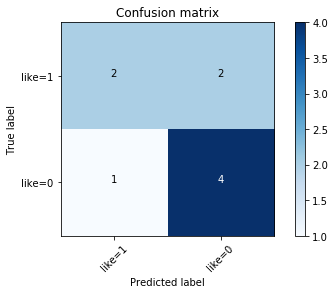

In [59]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['like=1','like=0'],normalize= False,  title='Confusion matrix')

In [60]:
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.67      0.80      0.73         5
          1       0.67      0.50      0.57         4

avg / total       0.67      0.67      0.66         9



In [61]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.67006045766557787

## Discussion

This log loss value is pretty high. Our model is not doing a good job of classifying which cities we would prefer.

In order to improve this model, we would have to extract data from many other cities.

We should consider other more prescriptive parameters. However, it's very time consuming to get data for all these cities and the time

pressure of the deadline approached. In the near future, we will improve on this model and republish the results in my personal blog.

###  Future Work: Other Datasets to Consider
####  Pollen and Mold Data

Pollen Data Source - Web Scraping Exercise (Complicated)

HOUSTON DATA - Station 188
http://pollen.aaaai.org/nab/index.cfm?p=AllergenCalendar&stationid=188&qsFullDate=10/1/2018

AUSTIN DATA - Station 111 

DENVER DATA - Station 196

SAN JOSE DATA - Station 108

SEATTLE DATA - Station 3

PORTLAND DATA - Station 1


Mold Spore Count Houston
http://www.houstontx.gov/health/Pollen-Mold/mold-archives.html

What the Numbers Mean
http://www.houstontx.gov/health/Pollen-Mold/numbers.html




In [ ]:
from PIL import Image
import requests
from io import BytesIO
url = 'https://www.zyrtec.com/sites/zyrtec_us/files/field/image/pollen-types-by-month-guide.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

###          Other Sources and Statistics to Consider:

I will have to think more deeply about where to find reliable data regarding these statistics and how to integrate them into my analysis: Healthiest US Cities, Best standard of living, cost of living, demographics.

This website contains open government data.
https://cities.data.gov/

## Conclusion

We had some success with a limited dataset to predict preferences.
Predicting preferences is extremely difficult since there are so many variables and many are subjective.
I thought this exercise would come up with a more clear-cut result!

Extending this example to other applications, marketers love to segment populations based on preferences, but this is a very complicated 
exercise. No wonder the tech companies want all the data they can gather about us.

It takes 10*(# of independent variables)/(smallest portion of yes/no preference) samples to be able to start having some success with
classification algorithms.

To improve this exercise, many more samples need to be taken. Therefore, I need to get a job so I am able to start travelling to all
these cities!